California housing dataset shape: (20640, 8) (20640,)


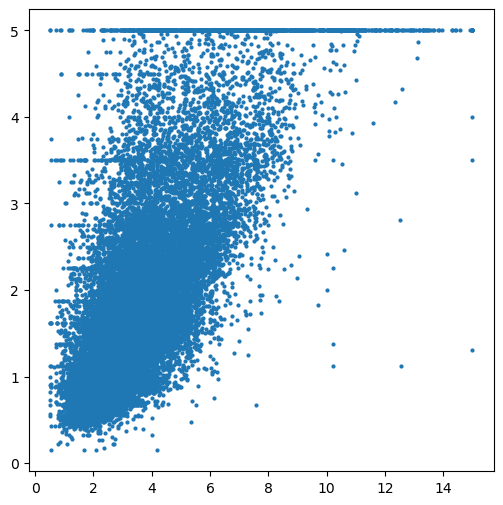

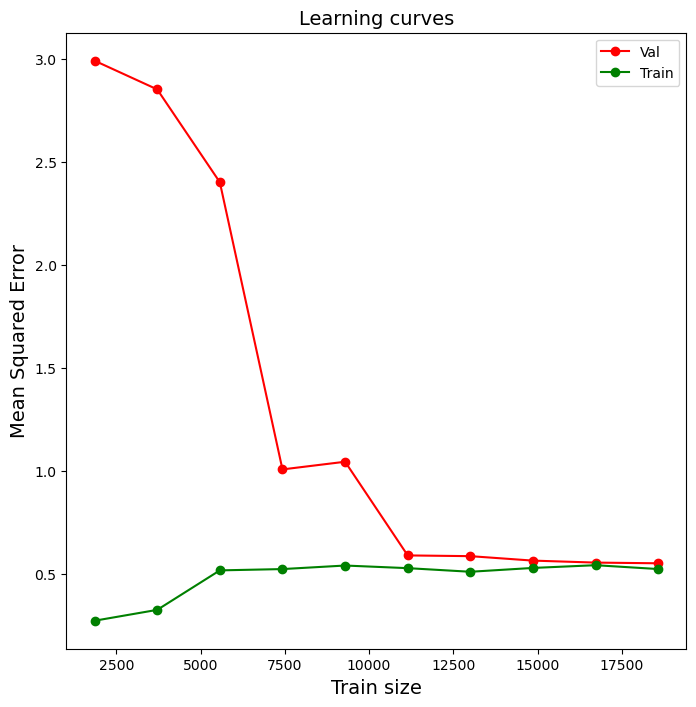

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve

#boston = load_boston()
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

X = california.data
y = california.target

print("California housing dataset shape:", X.shape, y.shape)

fig1 = plt.figure(figsize=(6,6))
plt.plot(X[:,0], y, 'o', markersize=2)



lin_reg = LinearRegression()
# Ten training sample sizes from 10% to 100%
train_sizes, train_scores_linreg, test_scores_linreg = \
    learning_curve(lin_reg, X, y, train_sizes=np.linspace(0.1, 1, 10), \
    scoring="neg_mean_squared_error", cv=10)

fig3 = plt.figure(figsize=(8, 8))

plt.plot(train_sizes, -test_scores_linreg.mean(1), 'o-', color="r", label="Val")
plt.plot(train_sizes, -train_scores_linreg.mean(1), 'o-', color="g", label="Train")
                   
plt.xlabel("Train size",fontsize=14)
plt.ylabel("Mean Squared Error",fontsize=14)
plt.title('Learning curves',fontsize=14)
plt.legend(loc="best");
#plt.ylim(0,200)

#plt.show()

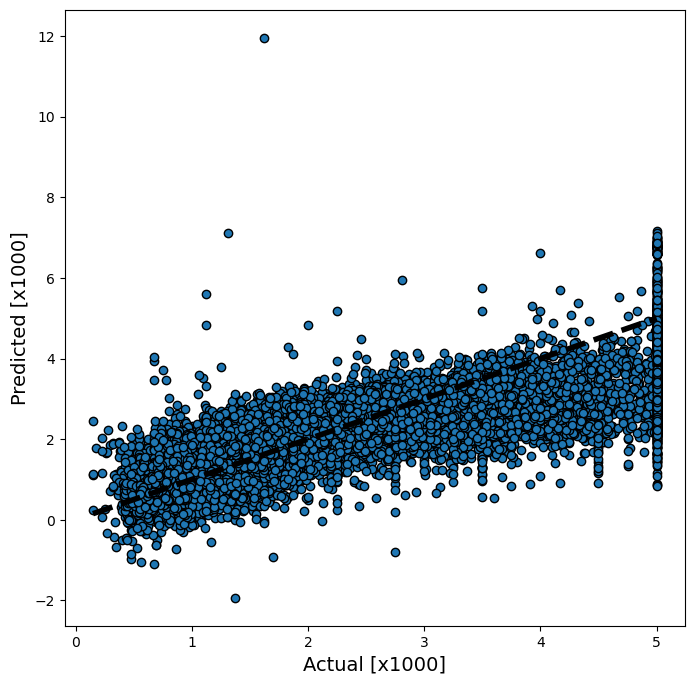

In [28]:
from sklearn.model_selection import cross_val_predict

linreg = LinearRegression()
linreg.fit(X, y)

# Do a 10-fold cross validation
# Then try a 3-fold cross validation
# Can you understand the difference?
ypred = cross_val_predict(linreg, X, y, cv=10)

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(y, ypred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual [x1000]',fontsize=14)
ax.set_ylabel('Predicted [x1000]',fontsize=14)
plt.show()


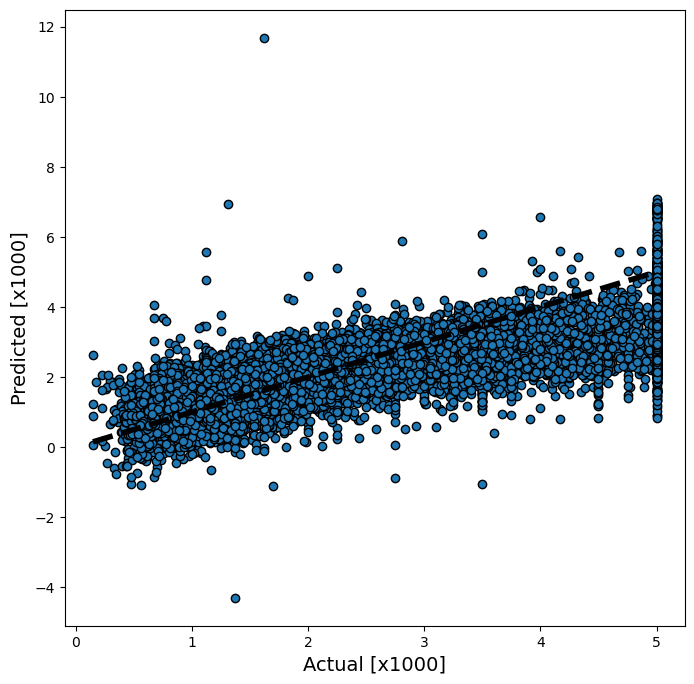

In [29]:
ypred = cross_val_predict(linreg, X, y, cv=3)

fig4, ax4 = plt.subplots(figsize=(8,8))
ax4.scatter(y, ypred, edgecolors=(0, 0, 0))
ax4.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax4.set_xlabel('Actual [x1000]',fontsize=14)
ax4.set_ylabel('Predicted [x1000]',fontsize=14)
plt.show()